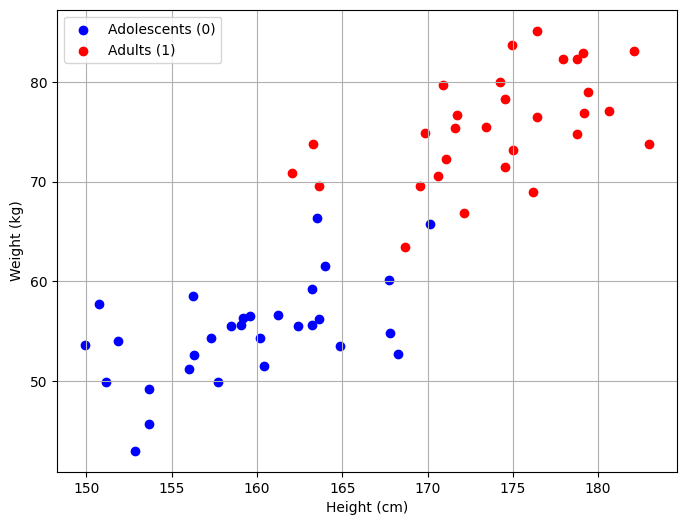

In [135]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

adolescents = np.random.multivariate_normal(
    mean=[160, 55],
    cov=[[25, 10], [10, 20]],
    size=30
)

adults = np.random.multivariate_normal(
    mean=[175, 75],
    cov=[[30, 15], [15, 25]],
    size=30
)

X = np.vstack((adolescents, adults))
y = np.array([0]*30 + [1]*30)

plt.figure(figsize=(8,6))
plt.scatter(adolescents[:,0], adolescents[:,1], c="blue", label="Adolescents (0)")
plt.scatter(adults[:,0], adults[:,1], c="red", label="Adults (1)")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.grid(True)
plt.show()

X = X.tolist()

In [ ]:
from math import exp, log

mins = [min([x[i] for x in X]) for i in range(len(X[0]))]
maxs = [max([x[i] for x in X]) for i in range(len(X[0]))]

def normalize_point(x, mins, maxs):
    return [(xi - m) / (M - m) for xi, m, M in zip(x, mins, maxs)]

def sigmoid(t):
    return 1 / (1 + exp(-t))

def cost(pred, real, n):
    total = 0
    for p, r in zip(pred, real):
        total += r * log(p + 1e-8) + (1 - r) * log(1 - p + 1e-8)
    return -total / n

weights = [0] * len(X[0])
b = 0
alpha = 0.1

X_norm = [normalize_point(x, mins, maxs) for x in X]

for epoch in range(5000):
    d_weights = [0] * len(X[0])
    db = 0
    n = len(X_norm)
    for xi, yi in zip(X_norm, y):
        pred = sigmoid(sum(w * x for w, x in zip(weights, xi)) + b)
        for i in range(len(d_weights)):
            d_weights[i] += (pred - yi) * xi[i] / n
        db += (pred - yi) / n
    for i in range(len(weights)):
        weights[i] -= alpha * d_weights[i]
    b = b - alpha * db

x_test = normalize_point([180, 70], mins, maxs)
prob = sigmoid(sum(w * x for w, x in zip(weights, x_test)) + b)
print(1 if prob >= 0.5 else 0)

1
